# **Understanding structure of dataset**

In [1]:
# First, let's load the dataset to understand its structure and determine the preprocessing steps needed.
import pandas as pd

# Load the dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preprocessing**

In [2]:
# Data Preprocessing Steps

# Remove the 'Id' column
iris_data.drop(columns='Id', inplace=True)

# Check for missing values
missing_values = iris_data.isnull().sum()

# Encode the 'Species' column using Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_data['Species'] = encoder.fit_transform(iris_data['Species'])

# Display the cleaned data and missing values
iris_data.head(), missing_values


(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 0            5.1           3.5            1.4           0.2        0
 1            4.9           3.0            1.4           0.2        0
 2            4.7           3.2            1.3           0.2        0
 3            4.6           3.1            1.5           0.2        0
 4            5.0           3.6            1.4           0.2        0,
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64)

# **Coordinate Descent for Logistic Regression**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Simplifying the problem to a binary classification (Only two species)
binary_iris_data = iris_data[iris_data['Species'] < 2]

# Separating the features and target
X = binary_iris_data.drop('Species', axis=1)
y = binary_iris_data['Species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Logistic Regression model with the 'liblinear' solver which uses Coordinate Descent
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

# **Lasso Regression for feature selection using Coordinate Descent**

In [4]:
from sklearn.linear_model import Lasso

# Using the full dataset for Lasso
X = iris_data.drop('PetalLengthCm', axis=1)
y = iris_data['PetalLengthCm']

# Splitting the data for Lasso regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Lasso Regression model with an alpha value of 0.01 (regularization strength)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = lasso_model.predict(X_test)

# Calculating the coefficients to see the feature selection
coefficients = lasso_model.coef_

# Calculating the R^2 score for evaluation
r_squared = lasso_model.score(X_test, y_test)

coefficients, r_squared


(array([ 0.68307636, -0.48438892,  1.02327607,  0.48008318]),
 0.9697629491290247)

# **Data Visualisation**

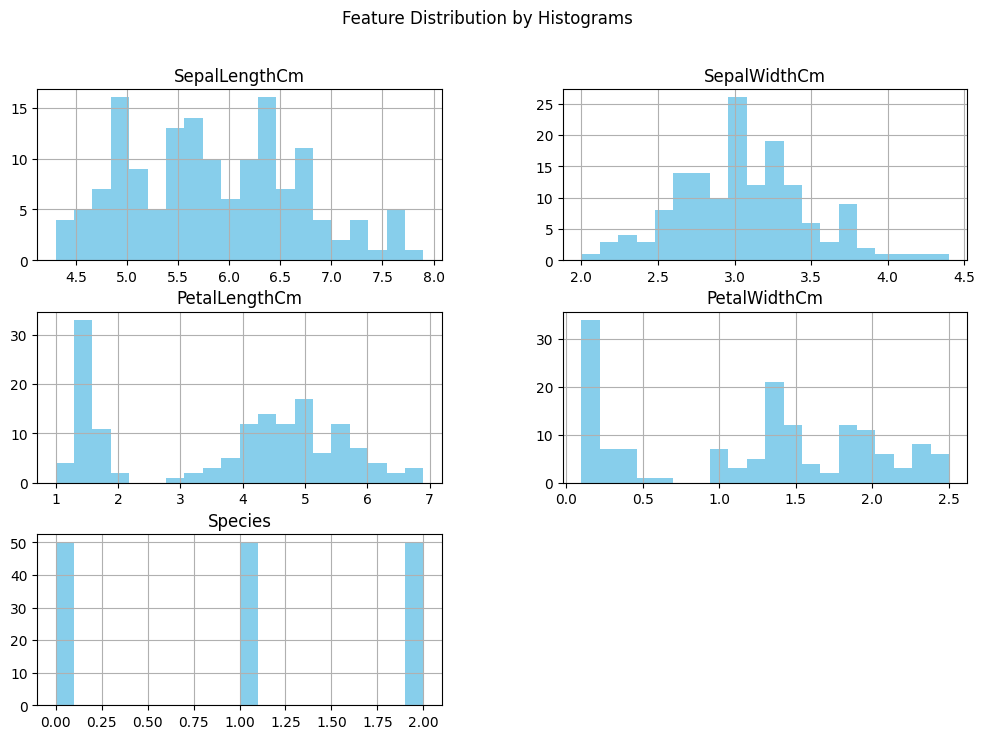

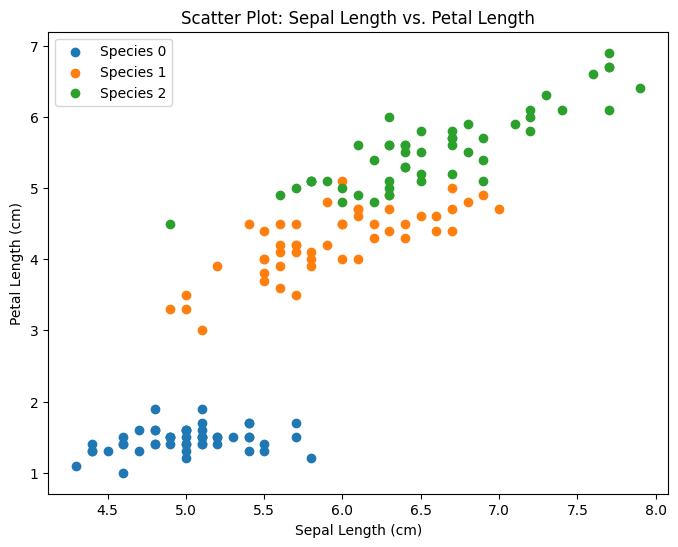

In [6]:
# Creating visualizations
import matplotlib.pyplot as plt

# Histograms for each feature
iris_data.hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle('Feature Distribution by Histograms')
plt.show()

# Scatter plot between SepalLengthCm and PetalLengthCm colored by Species
plt.figure(figsize=(8, 6))
for species, group in iris_data.groupby('Species'):
    plt.scatter(group['SepalLengthCm'], group['PetalLengthCm'], label=f'Species {species}')
plt.title('Scatter Plot: Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()
